In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-30", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["NIO", "WKHS", "TSLA"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

NIO                                      TSLA  \
                            open   high    low  close     volume      open   
2020-10-30 00:00:00-04:00  31.39  31.59  30.03  30.57  261574283  406.8954   

                                                                WKHS         \
                               high     low   close    volume   open   high   
2020-10-30 00:00:00-04:00  407.5915  379.11  388.04  40305209  17.02  17.04   

                                                   
                             low  close    volume  
2020-10-30 00:00:00-04:00  15.13  15.38  15434107

In [6]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-10-31", tz="America/New_York").isoformat()

In [7]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

NIO                                     TSLA  \
                           open    high    low   close    volume    open   
2019-01-02 00:00:00-05:00  6.13  6.2400  6.000  6.2050   8339198  306.50   
2019-01-03 00:00:00-05:00  6.10  6.1454  6.020  6.0550   6316673  307.00   
2019-01-04 00:00:00-05:00  6.19  6.4000  6.130  6.3400   8818858  306.00   
2019-01-07 00:00:00-05:00  6.41  6.5850  6.310  6.5000   9222915  321.66   
2019-01-08 00:00:00-05:00  6.57  6.5800  6.165  6.3990   9207141  341.98   
2019-01-09 00:00:00-05:00  6.41  6.6900  6.350  6.6200  10606823  335.50   
2019-01-10 00:00:00-05:00  6.63  6.7300  6.410  6.6650   9592003  334.40   
2019-01-11 00:00:00-05:00  6.50  6.6150  6.480  6.5816   6626062  342.09   
2019-01-14 00:00:00-05:00  6.51  7.1500  6.370  6.7700  19131104  342.50   
2019-01-15 00:00:00-05:00  6.85  7.0700  6.750  6.8400  11449718  335.00   

                                                                     WKHS  \
                               high       low     close    volume    open   
2019-01-02 00:00:00-05:00  315.1300  298.8000  309.8699  10751296  0.5700   
2019-01-03 00:00:00-05:00  309.4000  297.3800  300.3100   6672221  0.6700   
2019-01-04 00:00:00-05:00  318.0000  302.7300  317.5400   6983846  0.7665   
2019-01-07 00:00:00-05:00  336.7400  317.7508  334.9860   7193888  0.8000   
2019-01-08 00:00:00-05:00  344.0100  327.0200  335.4900   6567180  0.7900   
2019-01-09 00:00:00-05:00  343.5025  331.4700  338.5200   5199244  0.7700   
2019-01-10 00:00:00-05:00  345.3900  331.7900  344.9100   5719942  0.7315   
2019-01-11 00:00:00-05:00  348.4100  338.7700  347.3500   4796324  0.7101   
2019-01-14 00:00:00-05:00  342.5000  334.0000  334.7000   5009149  0.8000   
2019-01-15 00:00:00-05:00  348.8000  334.5000  344.3450   5803044  0.8000   

                                                             
                             high     low   close    volume  
2019-01-02 00:00:00-05:00  0.7100  0.5545  0.6501  534006.0  
2019-01-03 00:00:00-05:00  0.7300  0.6600  0.6950  319398.0  
2019-01-04 00:00:00-05:00  0.7990  0.7500  0.7990  448176.0  
2019-01-07 00:00:00-05:00  0.8000  0.7600  0.7800  126486.0  
2019-01-08 00:00:00-05:00  0.7900  0.7400  0.7599  151570.0  
2019-01-09 00:00:00-05:00  0.7790  0.7400  0.7466  111366.0  
2019-01-10 00:00:00-05:00  0.7423  0.7031  0.7100   97576.0  
2019-01-11 00:00:00-05:00  0.7900  0.6900  0.7801  208087.0  
2019-01-14 00:00:00-05:00  0.8199  0.7500  0.7800  497417.0  
2019-01-15 00:00:00-05:00  0.8351  0.7800  0.8251  245630.0

In [8]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["NIO"] = df_portfolio_year["NIO"]["close"]
df_closing_prices["WKHS"] = df_portfolio_year["WKHS"]["close"]
df_closing_prices["TSLA"] = df_portfolio_year["TSLA"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

NIO    WKHS      TSLA
2019-01-02  6.2050  0.6501  309.8699
2019-01-03  6.0550  0.6950  300.3100
2019-01-04  6.3400  0.7990  317.5400
2019-01-07  6.5000  0.7800  334.9860
2019-01-08  6.3990  0.7599  335.4900
2019-01-09  6.6200  0.7466  338.5200
2019-01-10  6.6650  0.7100  344.9100
2019-01-11  6.5816  0.7801  347.3500
2019-01-14  6.7700  0.7800  334.7000
2019-01-15  6.8400  0.8251  344.3450

In [9]:
df_daily_return = df_closing_prices.pct_change()
df_daily_return = df_daily_return.dropna()
df_daily_return.head()

NIO      WKHS      TSLA
2019-01-03 -0.024174  0.069066 -0.030851
2019-01-04  0.047069  0.149640  0.057374
2019-01-07  0.025237 -0.023780  0.054941
2019-01-08 -0.015538 -0.025769  0.001505
2019-01-09  0.034537 -0.017502  0.009032

In [10]:
df_daily_return.dtypes

NIO     float64
WKHS    float64
TSLA    float64
dtype: object

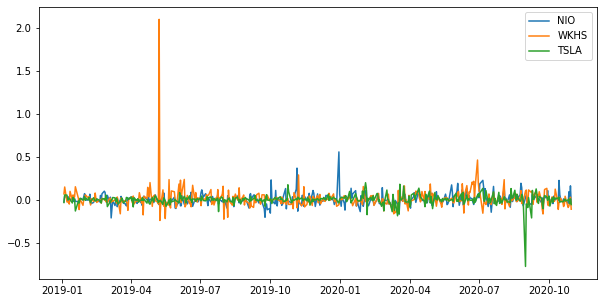

In [11]:
df_daily_return.plot(figsize=(10,5))

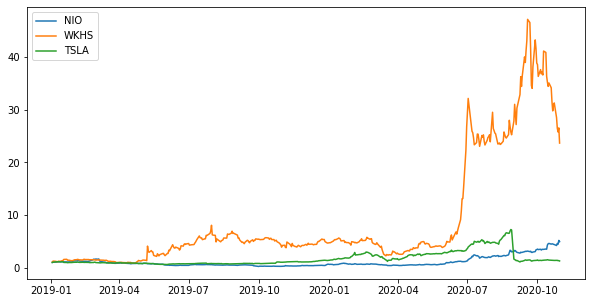

In [12]:
df_cumulative = (1 + df_daily_return).cumprod()
df_cumulative.plot(figsize=(10,5))

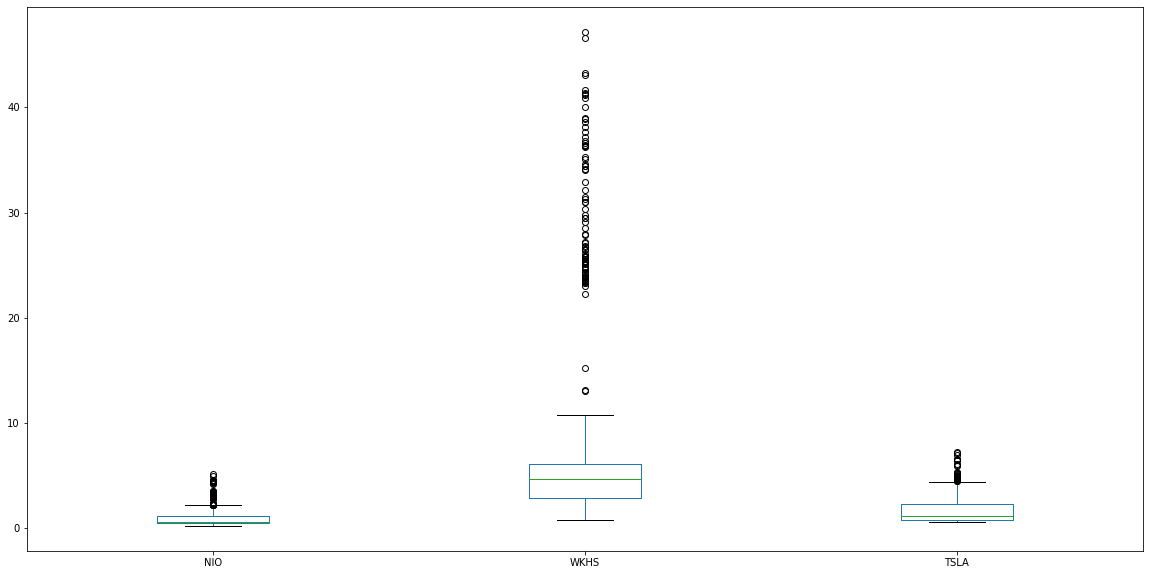

In [13]:
df_cumulative.plot.box(figsize=(20,10))

In [14]:
portfolio_std = df_daily_return.std()
portfolio_std

NIO     0.066892
WKHS    0.122670
TSLA    0.058403
dtype: float64

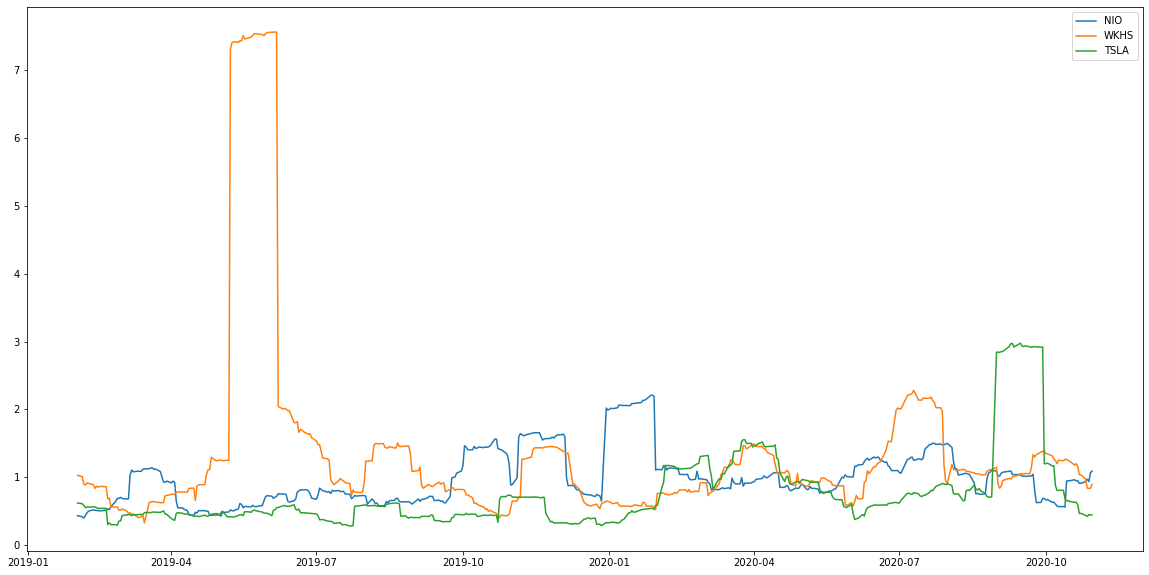

In [15]:
annualized_std = df_daily_return * np.sqrt(252)
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

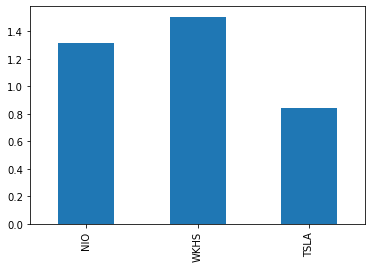

In [16]:
sharpe_ratios = (df_daily_return.mean() * 252) / (df_daily_return.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")

In [17]:
###Format current date as ISO format
start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-10-30", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AAPL", "AMZN", "MSFT", "MRNA", "NVDA", "JPM"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
best_stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

###Preview DataFrame
best_stocks_portfolio.head()

AAPL                                        \
                             open      high     low     close    volume   
2019-01-02 00:00:00-05:00  154.89  158.8500  154.23  157.5225  27803621   
2019-01-03 00:00:00-05:00  143.98  145.7200  142.00  142.2900  82418448   
2019-01-04 00:00:00-05:00  144.53  148.5499  143.80  148.1200  51267225   
2019-01-07 00:00:00-05:00  148.70  148.8300  145.90  147.9100  49982480   
2019-01-08 00:00:00-05:00  149.56  151.8200  148.52  150.6300  36592406   

                              AMZN                                         \
                              open     high        low     close   volume   
2019-01-02 00:00:00-05:00  1465.20  1553.36  1460.9300  1536.730  7132821   
2019-01-03 00:00:00-05:00  1520.01  1538.00  1498.1062  1502.070  6340704   
2019-01-04 00:00:00-05:00  1530.00  1594.00  1518.3100  1574.540  8285596   
2019-01-07 00:00:00-05:00  1602.31  1634.56  1589.1850  1631.120  7252880   
2019-01-08 00:00:00-05:00  1664.69  1676.61  1616.6100  1655.835  8184304   

                           ...    MSFT                                         \
                           ...    open      high       low    close    volume   
2019-01-02 00:00:00-05:00  ...   99.55  101.7500   98.9400  101.010  26692255   
2019-01-03 00:00:00-05:00  ...  100.00  100.1850   97.4000   97.500  34611003   
2019-01-04 00:00:00-05:00  ...   99.72  102.5100   98.9300  101.775  35976325   
2019-01-07 00:00:00-05:00  ...  101.64  103.2681  100.9800  102.150  28570376   
2019-01-08 00:00:00-05:00  ...  103.04  103.9700  101.7134  102.730  25193769   

                             NVDA                                        
                             open    high       low   close      volume  
2019-01-02 00:00:00-05:00  130.64  138.48  130.0500  136.00  10849501.0  
2019-01-03 00:00:00-05:00  133.79  135.16  127.6932  128.37  15496092.0  
2019-01-04 00:00:00-05:00  130.94  137.73  129.7000  135.85  13378304.0  
2019-01-07 00:00:00-05:00  138.50  144.89  136.4300  143.61  16318300.0  
2019-01-08 00:00:00-05:00  146.69  146.78  136.9000  139.60  18128834.0  

[5 rows x 30 columns]

In [18]:
# Create an empty DataFrame for closing prices
df_best_stocks = pd.DataFrame()

# Fetch the closing prices of stocks
df_best_stocks["AAPL"] = best_stocks_portfolio["AAPL"]["close"]
df_best_stocks["AMZN"] = best_stocks_portfolio["AMZN"]["close"]
df_best_stocks["MRNA"] = best_stocks_portfolio["MRNA"]["close"]
df_best_stocks["MSFT"] = best_stocks_portfolio["MSFT"]["close"]
df_best_stocks["NVDA"] = best_stocks_portfolio["NVDA"]["close"]
df_best_stocks["JPM"] = best_stocks_portfolio["JPM"]["close"]

# Drop the time component of the date
df_best_stocks.index = df_best_stocks.index.date

# Display sample data
df_best_stocks.head(10)

AAPL       AMZN    MRNA     MSFT     NVDA       JPM
2019-01-02  157.5225  1536.7300  15.290  101.010  136.000   99.1999
2019-01-03  142.2900  1502.0700  15.510   97.500  128.370   97.3200
2019-01-04  148.1200  1574.5400  16.975  101.775  135.850  100.6600
2019-01-07  147.9100  1631.1200  16.350  102.150  143.610  100.8600
2019-01-08  150.6300  1655.8350  16.950  102.730  139.600  100.4900
2019-01-09  153.3700  1657.5900  16.270  104.250  142.590  100.2800
2019-01-10  153.5500  1655.5000  16.485  103.570  145.300  100.3800
2019-01-11  152.0534  1639.6600  16.960  102.810  148.910  100.0000
2019-01-14  149.7600  1619.8767  16.740  102.120  150.745  100.9400
2019-01-15  152.9500  1672.7500  16.610  104.780  149.500  101.6100

In [19]:
##Join stocks
all_portfolios = pd.concat([df_best_stocks, df_closing_prices], axis="columns", join="inner")
all_portfolios.head()

AAPL      AMZN    MRNA     MSFT    NVDA       JPM    NIO  \
2019-01-02  157.5225  1536.730  15.290  101.010  136.00   99.1999  6.205   
2019-01-03  142.2900  1502.070  15.510   97.500  128.37   97.3200  6.055   
2019-01-04  148.1200  1574.540  16.975  101.775  135.85  100.6600  6.340   
2019-01-07  147.9100  1631.120  16.350  102.150  143.61  100.8600  6.500   
2019-01-08  150.6300  1655.835  16.950  102.730  139.60  100.4900  6.399   

              WKHS      TSLA  
2019-01-02  0.6501  309.8699  
2019-01-03  0.6950  300.3100  
2019-01-04  0.7990  317.5400  
2019-01-07  0.7800  334.9860  
2019-01-08  0.7599  335.4900

In [20]:
all_daily_return = all_portfolios.pct_change().dropna().copy()
all_daily_return.tail()

AAPL      AMZN      MRNA      MSFT      NVDA       JPM  \
2020-10-26  0.000174  0.000836 -0.003262 -0.028253 -0.033029 -0.024846   
2020-10-27  0.012776  0.025130  0.005692  0.014276  0.019148 -0.019060   
2020-10-28 -0.046168 -0.038149 -0.069902 -0.048980 -0.057250 -0.027887   
2020-10-29  0.030319  0.015905  0.083219  0.008288  0.030829  0.006214   
2020-10-30 -0.049074 -0.054986 -0.052247 -0.008856 -0.035026  0.009263   

                 NIO      WKHS      TSLA  
2020-10-26 -0.042342 -0.088496 -0.000796  
2020-10-27  0.093810 -0.071197  0.009972  
2020-10-28 -0.032689 -0.027294 -0.043515  
2020-10-29  0.162791  0.030448  0.011429  
2020-10-30 -0.044687 -0.108922 -0.055036

In [21]:
all_daily_return.describe()

AAPL        AMZN        MRNA        MSFT        NVDA         JPM  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean     0.000825    0.001679    0.004507    0.001751    0.003355    0.000297   
std      0.042330    0.020243    0.051481    0.022056    0.032264    0.025390   
min     -0.741696   -0.078818   -0.180007   -0.147533   -0.183698   -0.149649   
25%     -0.007613   -0.008128   -0.023351   -0.007667   -0.012072   -0.008856   
50%      0.002634    0.002051    0.000000    0.001942    0.003449    0.000890   
75%      0.014144    0.011255    0.027788    0.011381    0.019159    0.009455   
max      0.121210    0.078859    0.279634    0.144782    0.176135    0.179790   

              NIO        WKHS        TSLA  
count  462.000000  462.000000  462.000000  
mean     0.005551    0.011640    0.003093  
std      0.066892    0.122670    0.058403  
min     -0.210267   -0.239669   -0.774789  
25%     -0.031161   -0.031308   -0.014296  
50%      0.000000    0.000000    0.003336  
75%      0.032757    0.039590    0.023786  
max      0.557851    2.100205    0.199545

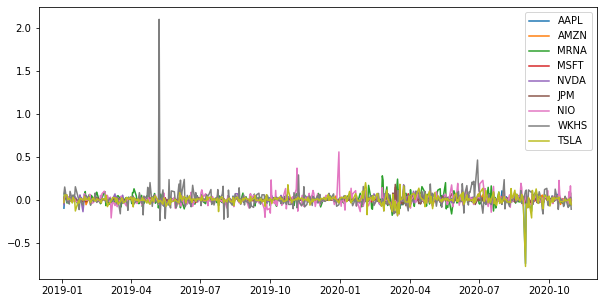

In [22]:
all_daily_return.plot(figsize=(10,5))

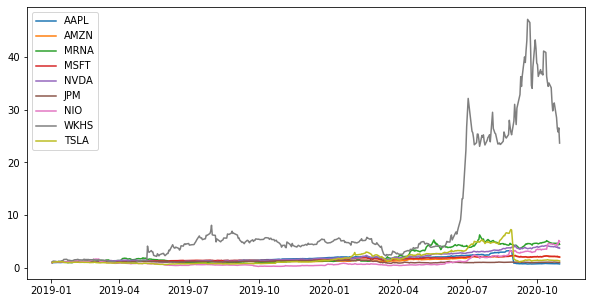

In [23]:
all_cumulative = (1 + all_daily_return).cumprod()
all_cumulative.plot(figsize=(10,5))

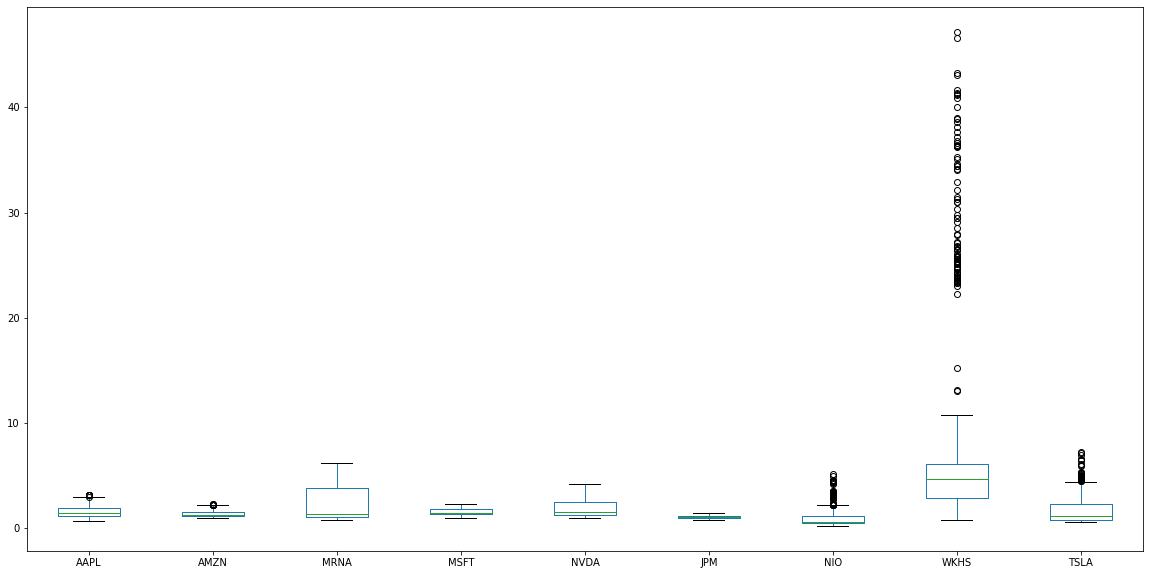

In [24]:
all_cumulative.plot.box(figsize=(20,10))

In [25]:
all_portfolio_std = all_daily_return.std().sort_values()
all_portfolio_std

AMZN    0.020243
MSFT    0.022056
JPM     0.025390
NVDA    0.032264
AAPL    0.042330
MRNA    0.051481
TSLA    0.058403
NIO     0.066892
WKHS    0.122670
dtype: float64

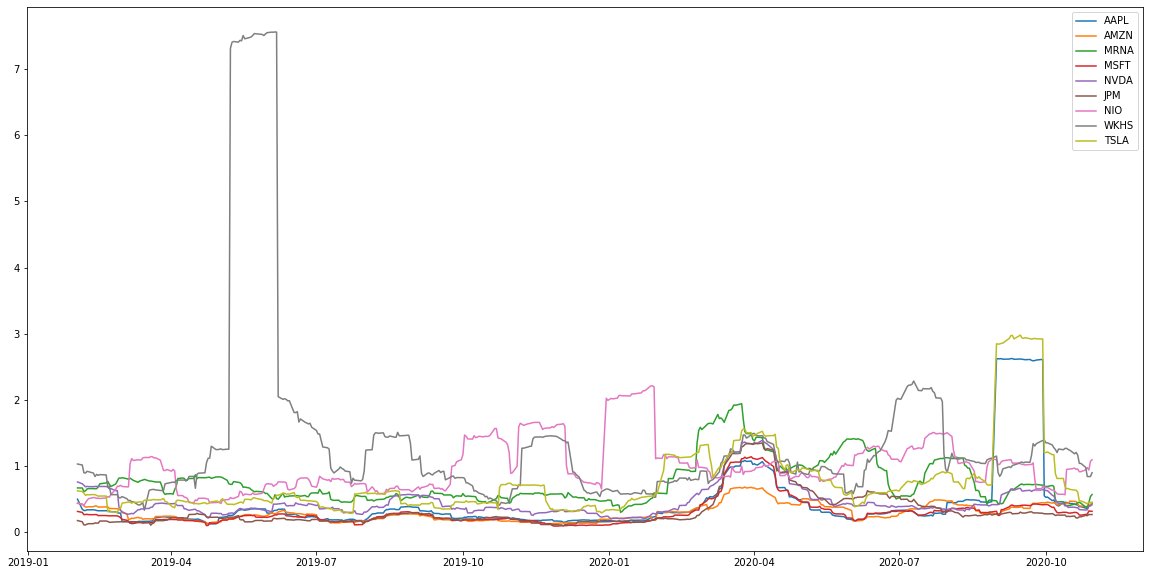

In [26]:
all_annualized_std = all_daily_return * np.sqrt(252)
all_annualized_std.rolling(window=21).std().plot(figsize=(20,10))

In [27]:
###Calculate and plot the correlation
all_correlation = all_portfolios.corr()
all_correlation

AAPL      AMZN      MRNA      MSFT      NVDA       JPM       NIO  \
AAPL  1.000000  0.291282  0.340760  0.468137  0.244798  0.073758 -0.147692   
AMZN  0.291282  1.000000  0.932969  0.914476  0.961403 -0.436790  0.810251   
MRNA  0.340760  0.932969  1.000000  0.857725  0.914672 -0.555950  0.727145   
MSFT  0.468137  0.914476  0.857725  1.000000  0.935840 -0.206287  0.621915   
NVDA  0.244798  0.961403  0.914672  0.935840  1.000000 -0.350407  0.818766   
JPM   0.073758 -0.436790 -0.555950 -0.206287 -0.350407  1.000000 -0.386922   
NIO  -0.147692  0.810251  0.727145  0.621915  0.818766 -0.386922  1.000000   
WKHS  0.024543  0.887530  0.773100  0.786225  0.885491 -0.313729  0.864336   
TSLA  0.839733  0.678778  0.705364  0.709176  0.622988 -0.277273  0.340006   

          WKHS      TSLA  
AAPL  0.024543  0.839733  
AMZN  0.887530  0.678778  
MRNA  0.773100  0.705364  
MSFT  0.786225  0.709176  
NVDA  0.885491  0.622988  
JPM  -0.313729 -0.277273  
NIO   0.864336  0.340006  
WKHS  1.000000  0.437471  
TSLA  0.437471  1.000000

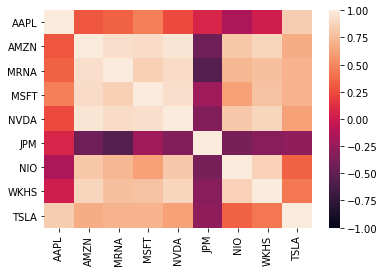

In [28]:
sns.heatmap(all_correlation, vmin=-1, vmax=1)

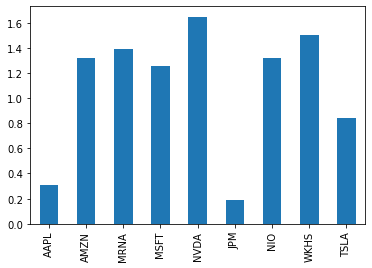

In [29]:
all_sharpe_ratios = (all_daily_return.mean() * 252) / (all_daily_return.std() * np.sqrt(252))
all_sharpe_ratios.plot(kind="bar")